# Question:
# Using a dataset of housing prices, develop a model to predict the price of a house based on its
# features. The dataset includes various attributes of the houses such as square footage, number
# of bedrooms, number of bathrooms, location, and more. Your task is to:
# 1. Clean and preprocess the data (handle missing values, encode categorical variables,
# etc.).
# 2. Perform feature engineering if necessary.
# 3. Train and evaluate multiple regression models (e.g., linear regression, decision tree
# regression, etc.).
# 4. Select the best-performing model and justify your choice.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Program Files\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
df = pd.read_csv('housing_prices.csv',encoding = 'latin-1')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
df[df.duplicated()].shape

(0, 13)

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


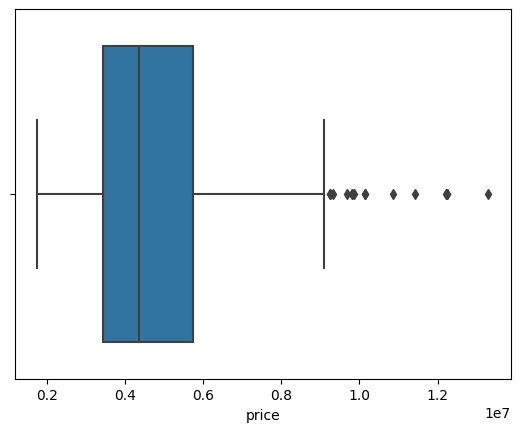

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


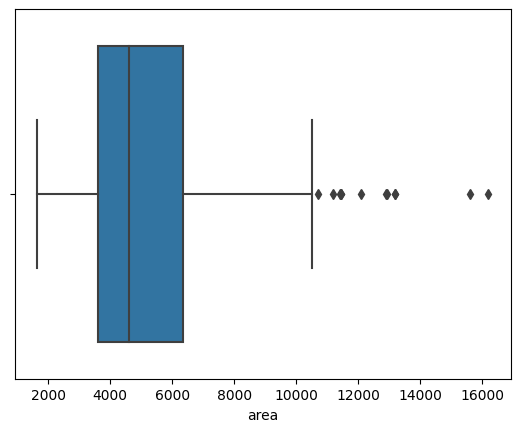

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


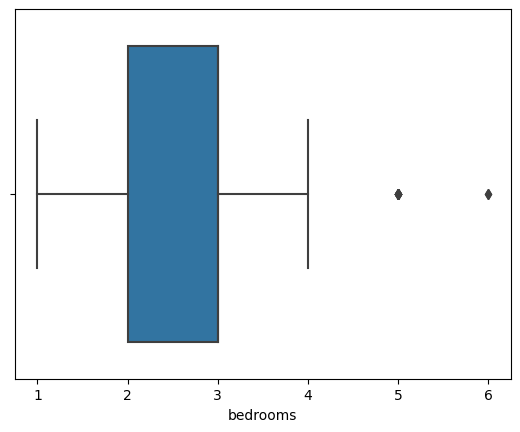

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


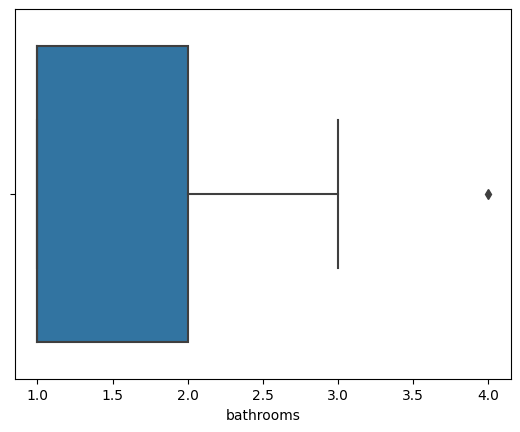

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


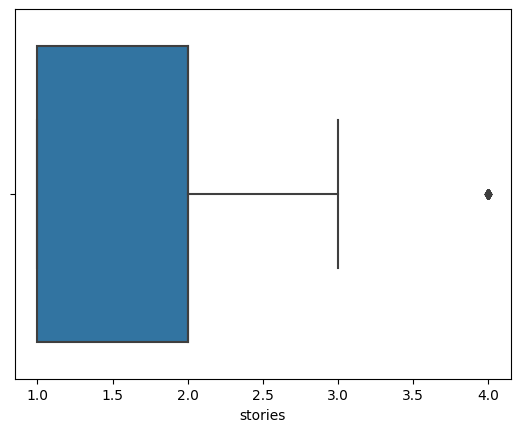

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


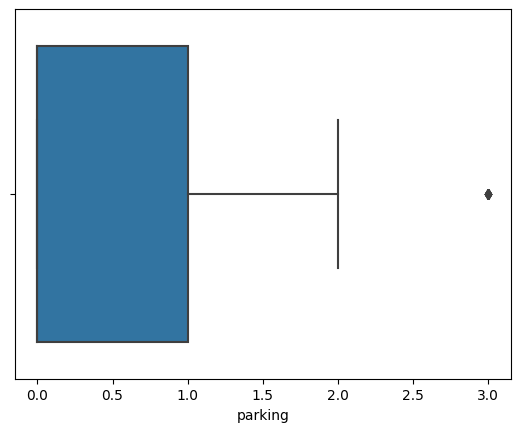

In [12]:
#outlier detection

for i in df.select_dtypes(include='number').columns:
	sns.boxplot(data=df,x=i)
	plt.show()

In [13]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

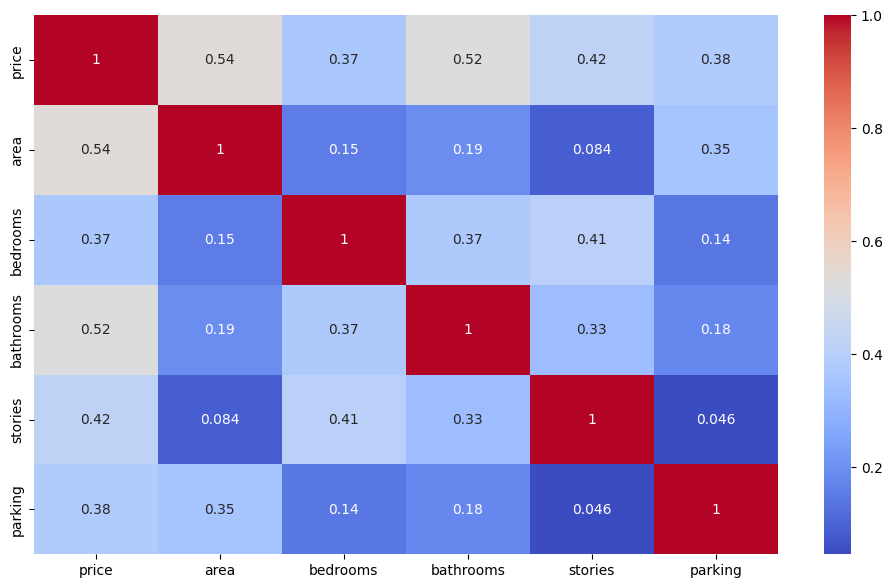

In [15]:
corr=df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df['prices_S'] = scalar.fit_transform(df[['price']])
df['area_S'] = scalar.fit_transform(df[['area']])

df['prices_S']

0      4.566365
1      4.004484
2      4.004484
3      3.985755
4      3.554979
         ...   
540   -1.576868
541   -1.605149
542   -1.614327
543   -1.614327
544   -1.614327
Name: prices_S, Length: 545, dtype: float64

In [38]:
from sklearn.preprocessing import LabelEncoder
Scaler1=LabelEncoder()
df['parking_e']=Scaler1.fit_transform(df['parking'])

In [76]:

x = df[['area_S','stories','parking_e','bedrooms']]
y = df['prices_S']


# x = df[['area','bedrooms']]
# y = df['price']

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

Model-1

In [78]:
from sklearn import linear_model
model1=linear_model.LinearRegression()
model1.fit(x_train,y_train)
prediction1 = model1.predict(x_test) 

In [80]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Calculate R2 score for model1
r2_model1 = r2_score(y_test, prediction1)
r2_model1

0.4627735289865076

In [82]:
mse_model1 = mean_squared_error(y_test, prediction1)
mse_model1

0.6624927080415981

In [83]:
mae_model1 = mean_absolute_error(y_test, prediction1)
print("Mean Absolute Error (MAE):", mae_model1)


Mean Absolute Error (MAE): 0.6151544504795863


Model-2

In [84]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(x_train, y_train)
prediction2 = model2.predict(x_test)


In [86]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Calculate R2 score for model2
r2_model2 = r2_score(y_test, prediction2)
r2_model2

0.3935345721020622

In [87]:
mse_model2 = mean_squared_error(y_test, prediction2)
mse_model2

0.7478762595293273

In [88]:
mae_model2 = mean_absolute_error(y_test, prediction2)
mae_model2

0.6331343947845598

model-3

In [89]:
from sklearn.svm import SVR
model3 = SVR()
model3.fit(x_train, y_train)
prediction3 = model3.predict(x_test)


In [91]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Calculate R2 score for model2
r2_model3 = r2_score(y_test, prediction3)
r2_model3

0.45323083874649805

In [92]:
mse_model3 = mean_squared_error(y_test, prediction3)
mse_model3

0.6742604876284444

In [93]:
mae_model3 = mean_absolute_error(y_test, prediction3)
mae_model3

0.6059593000087237